In [177]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

In [178]:
from tensorflow.keras.datasets import fashion_mnist

In [179]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train=tf.cast(x_train,tf.float32)/255
y_train=tf.cast(y_train,tf.float32)/255
x_test=tf.cast(x_test,tf.float32)/255
y_test=tf.cast(y_test,tf.float32)/255

In [171]:
len(x_train),len(x_test)

(60000, 10000)

In [172]:
feature,label=x_train[0],y_train[0]
feature.shape,feature.dtype

(TensorShape([28, 28]), tf.float32)

In [173]:
label,label.dtype,

(<tf.Tensor: shape=(), dtype=float32, numpy=0.03529412>, tf.float32)

In [174]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [175]:
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)))
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'reshape'

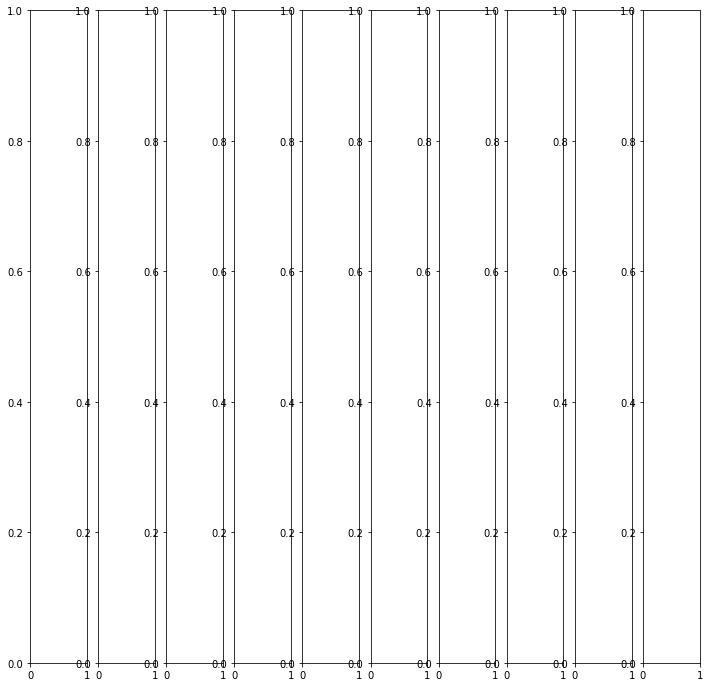

In [176]:
X, y = [], []
for i in range(10):
    X.append(x_train[i])
    y.append(y_train[i])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [180]:
batch_size=256
if sys.platform.startswith("win"):
    num_workers=0
else:
    num_workers=4
    
train_iter=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size)
test_iter=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size)
start = time.time()
for x,y in train_iter:
    continue
print("%.2f sec"% (time.time()-start))

0.38 sec


In [181]:
# 初始化参数
num_inputs=784
num_outputs=10
W=tf.Variable(tf.random.normal(shape=(num_inputs,num_outputs),mean=0,stddev=0.01,dtype=tf.float32))
B=tf.Variable(tf.zeros(num_outputs),dtype=tf.float32)

In [148]:
x=tf.random.normal(shape=(1,5))

In [149]:
tf.exp(x)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.4922959, 1.7670461, 8.415265 , 0.7779376, 1.0136974]],
      dtype=float32)>

In [150]:
tf.reduce_sum(tf.exp(x),1,keepdims=True)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[12.466243]], dtype=float32)>

In [151]:
tf.exp(x)/tf.reduce_sum(tf.exp(x),-1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.03949032, 0.14174649, 0.67504424, 0.06240353, 0.08131539]],
      dtype=float32)>

In [182]:
# softmax
def softmax(logits,axis=1):
    return tf.exp(logits)/tf.reduce_sum(tf.exp(logits),axis,keepdims=True)

In [183]:
# 模型
def net(X):
    return softmax(tf.matmul(tf.reshape(X,shape=(-1,W.shape[0])),W)+B)

In [154]:
net(x_train[0])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.11099646, 0.12202451, 0.08929972, 0.08061643, 0.1103151 ,
        0.09178003, 0.09656402, 0.0960687 , 0.10383672, 0.09849833]],
      dtype=float32)>

In [155]:
softmax(net(x_train[0]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.10109907, 0.10222016, 0.09892917, 0.09807386, 0.1010302 ,
        0.09917485, 0.09965044, 0.0996011 , 0.10037781, 0.09984338]],
      dtype=float32)>

In [156]:
# 损失函数
y_hat = np.array([[0.1, 0.2, 0.7], [0.3, 0.2, 0.5]])
n=np.array([2,1],dtype="int32")
tf.one_hot(n,depth=4)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [157]:
tf.boolean_mask(y_hat,tf.one_hot(n,depth=3))+1e-8

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.70000001, 0.20000001])>

In [158]:
-tf.math.log(tf.boolean_mask(y_hat,tf.one_hot(n,depth=3))+1e-8)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.35667493, 1.60943786])>

In [184]:
def cross_entropy(y_hat, y):
    y = tf.cast(tf.reshape(y, shape=[-1, 1]),dtype=tf.int32)
    y = tf.one_hot(y, depth=y_hat.shape[-1])
    y = tf.cast(tf.reshape(y, shape=[-1, y_hat.shape[-1]]),dtype=tf.int32)
    return -tf.math.log(tf.boolean_mask(y_hat, y)+1e-8)

In [185]:
# 计算准确率
def accuracy(y_hat, y):
    return np.mean((tf.argmax(y_hat, axis=1) == y))

In [186]:
# 描述,对于tensorflow2中，比较的双方必须类型都是int型，所以要将输出和标签都转为int型
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for _, (X, y) in enumerate(data_iter):
        y = tf.cast(y,dtype=tf.int64)
        acc_sum += np.sum(tf.cast(tf.argmax(net(X), axis=1), dtype=tf.int64) == y)
        n += y.shape[0]
    return acc_sum / n

In [187]:
print(evaluate_accuracy(test_iter, net))

0.0213


In [ ]:
# 训练

In [188]:
num_epochs, lr = 5, 0.1
# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                y_hat = net(X)
                l = tf.reduce_sum(loss(y_hat, y))
            grads = tape.gradient(l, params)
            if trainer is None:
                # 如果没有传入优化器，则使用原先编写的小批量随机梯度下降
                for i, param in enumerate(params):
                    param.assign_sub(lr * grads[i] / batch_size)
            else:
                # tf.keras.optimizers.SGD 直接使用是随机梯度下降 theta(t+1) = theta(t) - learning_rate * gradient
                # 这里使用批量梯度下降，需要对梯度除以 batch_size, 对应原书代码的 trainer.step(batch_size)
                trainer.apply_gradients(zip([grad / batch_size for grad in grads], params))  

            y = tf.cast(y, dtype=tf.float32)
            train_l_sum += l.numpy()
            train_acc_sum += tf.reduce_sum(tf.cast(tf.argmax(y_hat, axis=1) == tf.cast(y, dtype=tf.int64), dtype=tf.int64)).numpy()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

trainer = tf.keras.optimizers.SGD(lr)
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, B], lr)

epoch 1, loss 0.0199, train acc 0.996, test acc 1.000
epoch 2, loss 0.0031, train acc 1.000, test acc 1.000
epoch 3, loss 0.0020, train acc 1.000, test acc 1.000
epoch 4, loss 0.0015, train acc 1.000, test acc 1.000
epoch 5, loss 0.0012, train acc 1.000, test acc 1.000


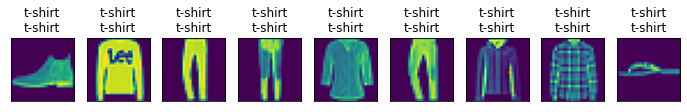

In [189]:
# 预测
import matplotlib.pyplot as plt
X, y = iter(test_iter).next()

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    # 这⾥的_表示我们忽略（不使⽤）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12)) # 这里注意subplot 和subplots 的区别
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(tf.reshape(img, shape=(28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(tf.argmax(net(X), axis=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[0:9], titles[0:9])